## Задание

Создайте автокодировщик, удаляющий черные квадраты в лучшайных областях изображений.

Алгоритм действий:
1. Возьмите базу картинок Mnist.
2. На картинках в случайных местах сделайте чёрные квадраты размера 8 на 8.
3. Создайте и обучите автокодировщик восстанавливать оригинальные изображения из "зашумленных" квадратом изображений.
4. Добейтесь MSE < 0.0070 на тестовой выборке

## Импорт библиотек

In [ ]:
# Отображение
import matplotlib.pyplot as plt

# Для работы с тензорами
import numpy as np 

# Класс создания модели
from tensorflow.keras.models import Model

# Для загрузки данных
from tensorflow.keras.datasets import mnist

# Необходимые слои
from tensorflow.keras.layers import Input, Conv2DTranspose, MaxPooling2D, Conv2D, BatchNormalization

# Оптимизатор
from tensorflow.keras.optimizers import Adam

## Данные

In [ ]:
# Загрузка данных
(X_train, y_train), (X_test, y_test) = mnist.load_data() 

11490434/11490434 [==============================] - 2s 0us/step


In [ ]:
# Нормировка данных
X_train = X_train.astype('float32')/255.
X_test = X_test.astype('float32')/255.

In [ ]:
# Изменение формы под удобную для Keras
X_train = X_train.reshape((-1, 28, 28, 1))
X_test = X_test.reshape((-1, 28, 28, 1))

In [ ]:
# Ваше решение

In [ ]:
X_train.shape

(60000, 28, 28, 1)

In [ ]:
#Функция последовательного вывода нескольких изображений для сравнения

In [ ]:
def plot_images(X, pred, shape=None, n=5):

    # Автоопределение формы данных
    if shape is None:                               

        # Форма изображения 
        shape = X.shape[1:3]                   

    # Размер полотна
    plt.figure(figsize=(14, 7))                     

    # Вывод n пар изображений
    for i in range(n):                              

        # Выбор случайного индекса изображения
        index = np.random.randint(0, pred.shape[0]) 

        # Показ картинки с индексом index из набора X
        ax = plt.subplot(2, n, i + 1)               # Картинка располагается в верхнем ряду

        # Серая палитра
        plt.imshow(X[index].reshape(shape), cmap='gray')

        # Без отображения числовых осей
        ax.get_xaxis().set_visible(False) 
        ax.get_yaxis().set_visible(False) 

        # Показ картинки с тем же индексом из предсказания автокодировщика
        ax = plt.subplot(2, n, i + 1 + n)           # Картинка располагается в нижнем ряду

        # Серая палитра
        plt.imshow(pred[index].reshape(shape), cmap='gray')

        # Без отображения числовых осей
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.show()

In [ ]:
# Автокодировщик

In [ ]:
def create_model():
    
    # Входной слой
    img_input = Input((28,28,1))

    # Сжатие изображения
    x = Conv2D(32, (3, 3), padding='same', activation='relu')(img_input) 
    x = BatchNormalization()(x) 
    x = Conv2D(32, (3, 3), padding='same', activation='relu')(x) 
    x = BatchNormalization()(x)
    x = MaxPooling2D()(x)

    x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    z = MaxPooling2D()(x)

    # Форма вектора в латентном пространстве: (7, 7, 1)

    # Расширение изображения
    x = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same', activation='relu')(z)
    x = BatchNormalization()(x)
    
    x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)

    x = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = Conv2D(32, (3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = Conv2D(32, (3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)

    # Финальный слой двумерной свертки, выдающий итоговое изображение
    x = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

    model = Model(img_input, x)
    model.compile(optimizer=Adam(.001),
                  loss='mean_squared_error')

    return model

In [ ]:
#Протестируем автокодировщик на работоспособность, обучив восстанавливать оригинальные данные из них же.

In [ ]:
# Создание автокодировщика
model = create_model() 

In [ ]:
model.fit(X_train, X_train, 
          epochs=5,
          batch_size=128,
          validation_data = (X_test, X_test))

Epoch 1/5
469/469 [==============================] - 23s 29ms/step - loss: 0.0107 - val_loss: 0.0079
Epoch 2/5
469/469 [==============================] - 12s 26ms/step - loss: 0.0019 - val_loss: 0.0029
Epoch 3/5
469/469 [==============================] - 12s 26ms/step - loss: 0.0014 - val_loss: 0.0016
Epoch 4/5
469/469 [==============================] - 12s 27ms/step - loss: 0.0011 - val_loss: 9.3317e-04
Epoch 5/5
469/469 [==============================] - 12s 27ms/step - loss: 9.5093e-04 - val_loss: 8.9976e-04


In [ ]:
model.fit(X_train[:500], X_train[:500], 
          epochs=5,
          batch_size=128,
          validation_data = (X_test[:10], X_test[:10]))

Epoch 1/5
4/4 [==============================] - 1s 170ms/step - loss: 8.8770e-04 - val_loss: 9.0986e-04
Epoch 2/5
4/4 [==============================] - 0s 31ms/step - loss: 9.4398e-04 - val_loss: 7.7095e-04
Epoch 3/5
4/4 [==============================] - 0s 32ms/step - loss: 8.2911e-04 - val_loss: 6.9223e-04
Epoch 4/5
4/4 [==============================] - 0s 33ms/step - loss: 7.6181e-04 - val_loss: 6.1309e-04
Epoch 5/5
4/4 [==============================] - 0s 32ms/step - loss: 8.1913e-04 - val_loss: 7.0792e-04


In [ ]:
# Посмотрим, какие изображения получаются на выходе.

In [ ]:
pred = model.predict(X_test)

313/313 [==============================] - 1s 3ms/step


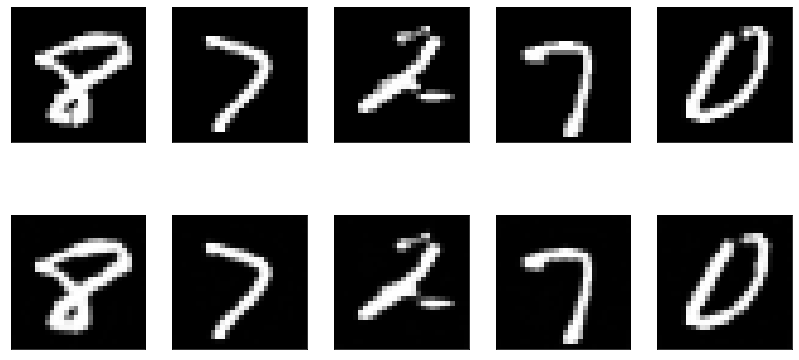

In [ ]:
# Отображение результата
plot_images(X_test, pred)

In [ ]:
# Создание данных с черными квадратами

In [ ]:
# Загрузка данных
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Нормировка данных
X_train = X_train.astype('float32')/255.
X_test = X_test.astype('float32')/255.

# Изменение формы под удобную для Keras
X_train = X_train.reshape((-1, 28, 28, 1))
X_test = X_test.reshape((-1, 28, 28, 1))

In [ ]:
#Создадим функцию добавления квадрата на подаваемое изображение.

In [ ]:
def add_square(x):
  x = x.copy()
  # Создаем координату Х квадрата
  squareRandomX = np.random.randint(20) 

  # Создаем координату Y квадрата
  squareRandomY = np.random.randint(20) 

  # Закрашивание черным пикселей в рамках квадрата
  for i in range(squareRandomX,squareRandomX+8):
    for j in range(squareRandomY,squareRandomY+8):
         x[i,j] = 0
         
  return x

In [ ]:
#Пересоздадим выборки. Пусть теперь метки будут y_train, y_test – оригинальные изображения, 
#X_train, X_test – оригинальные изображения с добавленными черными квадратами.

In [ ]:
# Переопределение меток
y_train = X_train.copy()
y_test = X_test.copy()

In [ ]:
X_train.shape

(60000, 28, 28, 1)

In [ ]:
# Создание тренировочных объектов
X_train = np.array(list(map(add_square, X_train)))
X_test = np.array(list(map(add_square, X_test)))

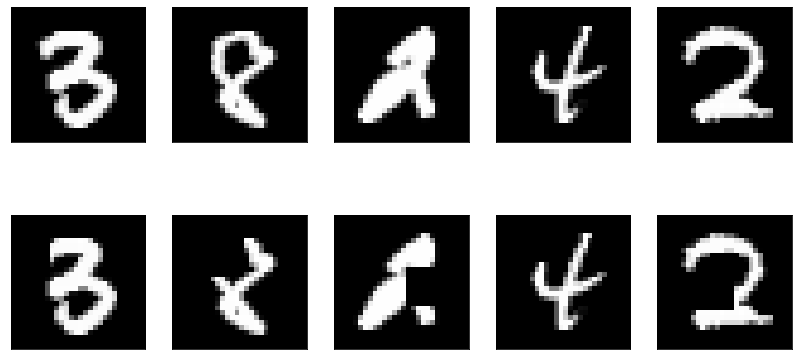

In [ ]:
# Отрисовка результата
plot_images(y_train, X_train)

In [ ]:
# Создание модели
model = create_model()

In [ ]:
# Тренировка
model.fit(X_train, y_train, 
          epochs=10,
          batch_size=128,
          validation_data = (X_test, y_test))

Epoch 1/10
469/469 [==============================] - 14s 27ms/step - loss: 0.0163 - val_loss: 0.0251
Epoch 2/10
469/469 [==============================] - 12s 27ms/step - loss: 0.0058 - val_loss: 0.0062
Epoch 3/10
469/469 [==============================] - 13s 27ms/step - loss: 0.0050 - val_loss: 0.0051
Epoch 4/10
469/469 [==============================] - 13s 27ms/step - loss: 0.0045 - val_loss: 0.0049
Epoch 5/10
469/469 [==============================] - 13s 27ms/step - loss: 0.0042 - val_loss: 0.0071
Epoch 6/10
469/469 [==============================] - 13s 27ms/step - loss: 0.0040 - val_loss: 0.0045
Epoch 7/10
469/469 [==============================] - 13s 27ms/step - loss: 0.0038 - val_loss: 0.0040
Epoch 8/10
469/469 [==============================] - 13s 27ms/step - loss: 0.0037 - val_loss: 0.0038
Epoch 9/10
469/469 [==============================] - 12s 27ms/step - loss: 0.0036 - val_loss: 0.0043
Epoch 10/10
469/469 [==============================] - 13s 27ms/step - loss: 0.003

313/313 [==============================] - 1s 3ms/step


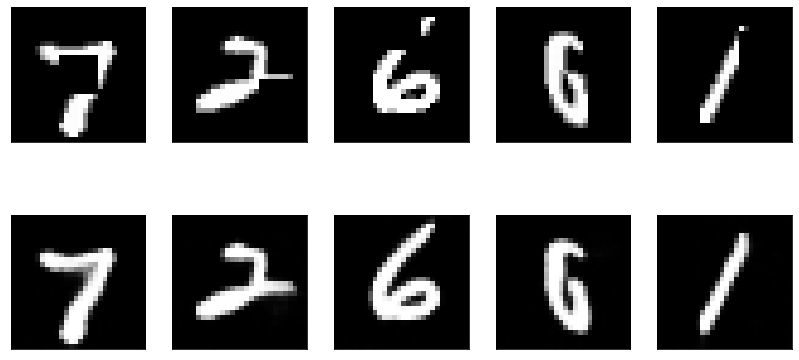

In [ ]:
# Восстановление
pred = model.predict(X_test)

# Отображение результата
plot_images(X_test, pred)